### Prediction using Supervised ML

#### `Predict the Salary of an employee based on Years of Experience.`

#### Linear Regression

> The term regression is used when you try to find the relationship between variables.

> In Machine Learning, and in statistical modeling, that relationship is used to predict the outcome of future events.

> Linear regression is a supervised learning algorithm because it uses true labels for training. Supervised learning algorithm should have input variable (x) and an output variable (Y) for each example.

> Linear regression uses the relationship between the data-points to draw a straight line through all them.

> This line can be used to predict future values.

### 1. Importing the required Libraries.

In [1]:
import pandas as pd #Pandas allows you to do various data manipulations.
import numpy as np  #Numpy allows you to perform various number of mathematical operations.
import matplotlib.pyplot as plt #Matplotlib allows you to create graphical user interfaces to visualize data. 
%matplotlib inline

### 2. Importing Data from the Dataset.

In [2]:
data = pd.read_csv("Salary_Data.csv") #Reading CSV file from the above link.
print("------------Data imported successfully---------------\n")
data.info()
data.head(10)#df.head() allows you to print 10 rows in your dataset.

------------Data imported successfully---------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


### 3. Visualizing the dataset graphically by ploting our data points on 2D graph.

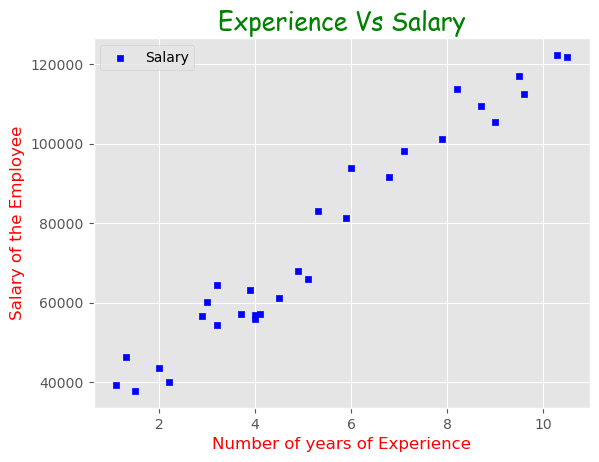

In [44]:
data.plot.scatter(x='YearsExperience', y='Salary',label='Salary', marker='s',color='blue')
plt.style.use('ggplot')
plt.title('Experience Vs Salary',fontsize=18,color='green',fontname='Comic Sans MS')  
plt.xlabel('Number of years of Experience',color='red')  
plt.ylabel('Salary of the Employee',color='red')  
plt.show()

> From the Plot above, we can clearly see that there is a positive linear relation between the number of years Experience and Salary of the Employee.

### 4. Preparing the Data

* The next step is to divide the data into X (inputs) and y (outputs).

In [4]:
x = data.iloc[:, :-1].values  # selecting number of years of Experience as Input
y = data.iloc[:, 1].values # selecting Salary as Output

* The next step is to split this data into training and test sets. Do this by using Scikit-Learn's built-in train_test_split() method:

In [5]:
# import train_test_split method from sklearn.model_selection
from sklearn.model_selection import train_test_split  


'''
Now i have to providing a test_size of 0.5 which means testing set will contain 15 observations and 
training set will contain 15 observations.

train_test_split splits arrays or matrices into random training and testing subsets. 
That means that everytime you run it without specifying random_state, you will get a different result
of X_train, X_test, y_train, y_test data.

'''

X_train, X_test, Y_train, Y_test = train_test_split(x, y, 
                            test_size=0.5, random_state=0)

### 5. Training the Algorithm

* After spliting the data into training and testing sets, Train the model.

In [6]:
from sklearn.linear_model import LinearRegression  
lin_regressor = LinearRegression()  
lin_regressor.fit(X_train, Y_train) 

print("xxxxxxxxxxxxxx Training the Model is completed.xxxxxxxxxxxxxxxxxxx")

xxxxxxxxxxxxxx Training the Model is completed.xxxxxxxxxxxxxxxxxxx


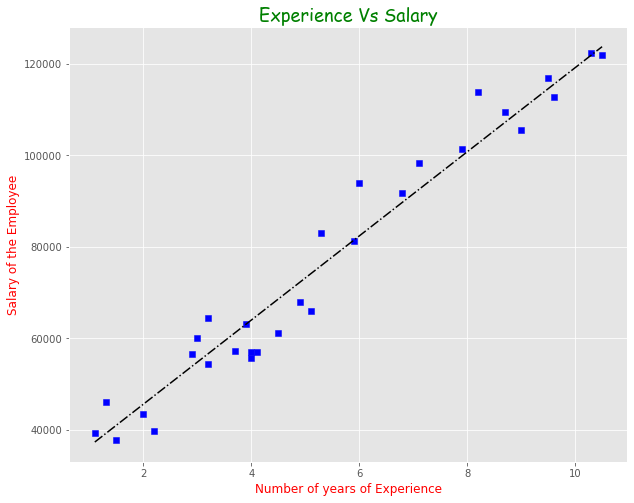

In [28]:
# Draw the line of Linear Regression
line = lin_regressor.coef_*x + lin_regressor.intercept_

# Plotting for the test data
plt.figure(figsize=(10, 8))
plt.scatter(x, y, marker='s',color='blue')
plt.style.use('ggplot')
plt.title('Experience Vs Salary',fontsize=18,color='green',fontname='Comic Sans MS')  
plt.xlabel('Number of years of Experience',color='red')  
plt.ylabel('Salary of the Employee',color='red')  
plt.plot(x, line,color="black",linestyle='-.')
plt.show()

### 6. Making Predictions

* The Model is trained,and it's time to make some predictions.

In [8]:
y_pred = lin_regressor.predict(X_test) # Predicting the Salary
df = pd.DataFrame({'Input [X_test]': list(X_test), 'Output [y_pred]': np.round(y_pred)})
df.head(10)

,Input [X_test],Output [y_pred]
0,[1.5],41051.0
1,[10.3],121866.0
2,[4.1],64928.0
3,[3.9],63091.0
4,[9.5],114520.0
5,[8.7],107173.0
6,[9.6],115438.0
7,[4.0],64010.0
8,[5.3],75948.0
9,[7.9],99826.0


In [9]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual_Salary': Y_test, 'Predicted_Salary': np.round(y_pred)}) #Comparing the accurracy  
df.head(10)

,Actual_Salary,Predicted_Salary
0,37731.0,41051.0
1,122391.0,121866.0
2,57081.0,64928.0
3,63218.0,63091.0
4,116969.0,114520.0
5,109431.0,107173.0
6,112635.0,115438.0
7,55794.0,64010.0
8,83088.0,75948.0
9,101302.0,99826.0


In [10]:
# Test with own data
Experience = int(input("Enter Your Experience: "))
own_pred = lin_regressor.predict([[Experience]])
print("{} Years of Experience.".format(Experience))
print("Predicted Salary: ₹ {}".format(round(own_pred[0])))

Enter Your Experience: 5
5 Years of Experience.
Predicted Salary: ₹ 73193


#### Evaluating the model

In [11]:
from sklearn.metrics import r2_score
# r2 score for perfect model is 1.0
print("Models r2 score: ",r2_score(Y_test,y_pred)) 

Models r2 score:  0.952801713096894
